# SMOTE-based sampling techniques

importing the imblearn package and generating an example dataset:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1, weights=(0.05,0.15,0.8), class_sep=0.99, random_state=14)


# The data
Our starting data:

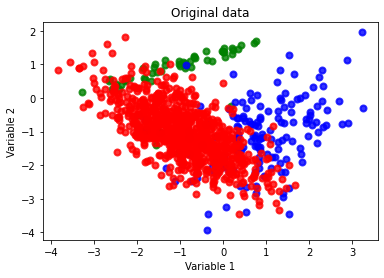

In [2]:
colors = ['green','blue','red']
lw = 2
for color , i in zip(colors, [0,1,2]):
    plt.scatter(X[y==i,0], X[y==i,1], color=color, alpha=0.8, lw=lw)
plt.title('Original data')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()

 there are numerous cases in which skewness of the distribution towards a certain label can have a negative influence on classification results. There are metrics that measure the skewness. One which is commonly used for measuring skewness is the sample skewness:


A heuristic to see whether a distribution is skewed is by looking at the ratio between the proportion of the most and least occurring classes.

If this ratio is greater than 20, the skewness is significant.

Undersampling reduces the number of samples that are present from the majority class. Such as the one that is overrepresented. Typically, we use fixed undersampling, which aims to obtain a certain set ratio between the minority and majority classes. The opposite is oversampling, where the number of observations of the minority class is extended by duplicating them. Again, this can be done by maintaining a certain ratio.

## Undersampling

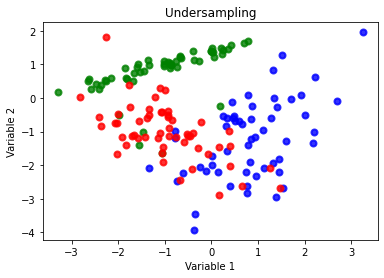

In [9]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

X_s = X_resampled
y_s = y_resampled
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_s[y_s == i, 0], X_s[y_s == i, 1], color=color, alpha=.8, lw=lw)
plt.title('Undersampling')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

In [28]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN 

X,y = make_classification(n_samples=1000, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=3,
                               n_clusters_per_class=1,
                               weights=(0.05,0.15,0.8),
                               class_sep=0.99, random_state=14)

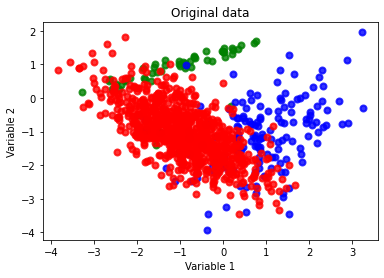

In [29]:
colors = ['green','blue','red']
lw = 2

for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw)
plt.title('Original data')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

## Undersampling

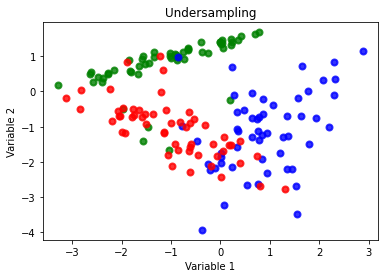

In [10]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

X_s = X_resampled
y_s = y_resampled
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_s[y_s == i, 0], X_s[y_s == i, 1], color=color, alpha=.8, lw=lw)
plt.title('Undersampling')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

## Oversampling

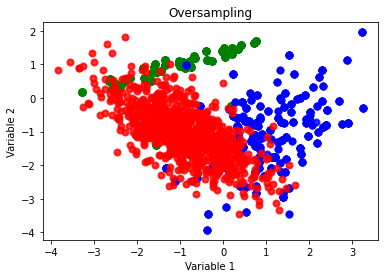

In [15]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_s = X_resampled
y_s = y_resampled
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_s[y_s == i, 0], X_s[y_s == i, 1], color=color, alpha=.8, lw=lw)
plt.title('Oversampling')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()


## SMOTE

A well-known technique used to do this is Synthetic Minority Oversampling TEchnique (SMOTE). However, SMOTE does not rely on duplicating existing observations, but rather creates similar ones to avoid any repetition of the existing observations. For every observation in the minority class,  nearest neighbours are sought. Then, a sample of these is withheld and new samples are created uniformly at random by selecting a point in space between the existing observations. Meaning it creates synthetic new ones.

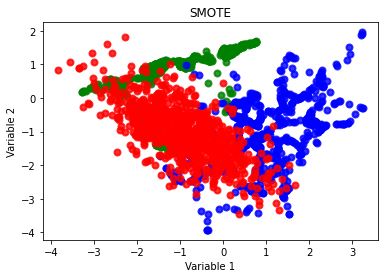

In [16]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X,y)

X_s = X_resampled
y_s = y_resampled

for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_s[y_s == i, 0], X_s[y_s == i, 1], color=color, alpha=.8, lw=lw)
plt.title('SMOTE')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

## ADASYN

Another technique that is often used is ADAptive SYNthetic (ADASYN) sampling. It uses the same principle as SMOTE but focuses on the samples from the minority class, which are closer to the decision boundary and are harder to learn as they are more difficult to distinguish from other classes.

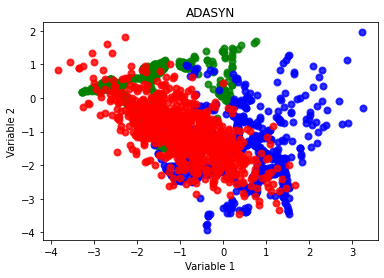

In [18]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, y)

X_s = X_resampled
y_s = y_resampled
for color, i in zip(colors, [0,1,2]):
    plt.scatter(X_s[y_s == i, 0], X_s[y_s == i, 1], color=color, alpha=0.8, lw=lw)
plt.title('ADASYN')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

## SMOTE-ENN

Hybrid sampling approaches involve both under- and oversampling at the same time.

They prevent the oversampling techniques from resulting in overfitting by increasing the number of samples of a particular class.

They act as a cleaning mechanism on the dataset.

A well-known technique that does this is SMOTE-EEN, which is a combination of SMOTE and Edited Nearest Neighbour (ENN).

ENN removes any observation of which the class label is different from that of at least two of its three nearest neighbours. In other words, it removes observations that might have been added incorrectly, or that are falling behind the decision boundary and might make classification harder.

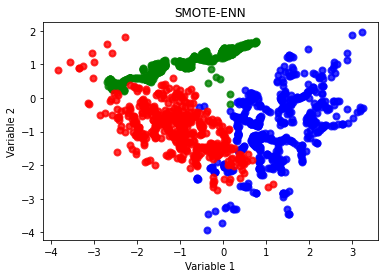

In [19]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
X_s = X_resampled
y_s = y_resampled
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_s[y_s == i, 0], X_s[y_s == i, 1], color=color, alpha=.8, lw=lw)
plt.title('SMOTE-ENN')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

## SMOTE + Tomek

Finally, there is SMOTE + Tomek. Tomek links are a connection between two observations *oi*and*oj*  from different classes, such that there exists no *ol* such that *d(oi,ol) < d(oi,oj)* or *d(oj,ol) < d(oi,oj)* where d() is a distance function.

In other words, there are no observations between them, but they are from different classes, meaning that they are noise or borderline cases.

They can be used to remove the observations that are linked up and belonging to the majority class. However, together with SMOTE, they can be used to remove both observations that are linked up through Tomek links.

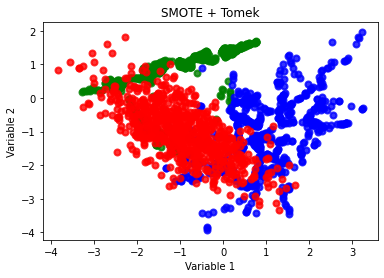

In [21]:
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_resample(X, y)


X_s = X_resampled
y_s = y_resampled
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_s[y_s == i, 0], X_s[y_s == i, 1], color=color, alpha=.8, lw=lw)
plt.title('SMOTE + Tomek')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()